In [99]:
import warnings
import numpy as np
import pandas as pd
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from sklearn import datasets
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt

In [87]:
def running(*args):
    with tf.Session() as sess:
        sess.run(args)

In [46]:
var = tf.add(3, 5, name='var')
var

<tf.Tensor 'var_4:0' shape=() dtype=int32>

In [47]:
running(var)

(8,)


In [48]:
var = tf.add(np.array(np.arange(10)), np.array(np.arange(10)))

In [49]:
running(var)

(array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18]),)


In [50]:
x = 2
y = 3
op1 = tf.add(x, y, name='add')
op2 = tf.multiply(x, y, 'multiple')
useless = tf.multiply(x, op1)
op3 = tf.pow(op2, op1, name='pow')

running(op3, useless)

(7776, 10)


In [51]:
x_data = datasets.load_boston().data[:, 12]
y_data = datasets.load_boston().target
boston_df = pd.DataFrame([x_data, y_data]).transpose()
boston_df.head()

,0,1
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [59]:
w = tf.Variable(tf.random_normal([1]))
b = tf.Variable(tf.random_normal([1]))
y_predicted = w * x_data + b

In [66]:
loss = tf.reduce_mean(tf.square(y_predicted - y_data))
# running_rate
optimizer = tf.train.GradientDescentOptimizer(0.001)
train = optimizer.minimize(loss)

In [106]:
# running(tf.random_poisson(np.arange(10), [10]))
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10000):
        sess.run(train)
        if step % 1000 == 0:
            print(f'Step {step} : w {sess.run(w)} b {sess.run(b)}')
            print(f'loss {sess.run(loss)}')        
            print()
    w_out, b_out = sess.run([w, b])

Step 0 : w [0.12040395] b [1.3244956]
loss 484.29345703125

Step 1000 : w [0.28137404] b [14.042841]
loss 139.9609375

Step 2000 : w [-0.18868007] b [21.872221]
loss 77.27545166015625

Step 3000 : w [-0.47930506] b [26.712967]
loss 53.31248092651367

Step 4000 : w [-0.65899533] b [29.705948]
loss 44.151939392089844

Step 5000 : w [-0.77009594] b [31.556477]
loss 40.650054931640625

Step 6000 : w [-0.83878624] b [32.700607]
loss 39.311405181884766

Step 7000 : w [-0.881257] b [33.408012]
loss 38.799659729003906

Step 8000 : w [-0.90751565] b [33.845383]
loss 38.60403060913086

Step 9000 : w [-0.9237509] b [34.115803]
loss 38.52925109863281



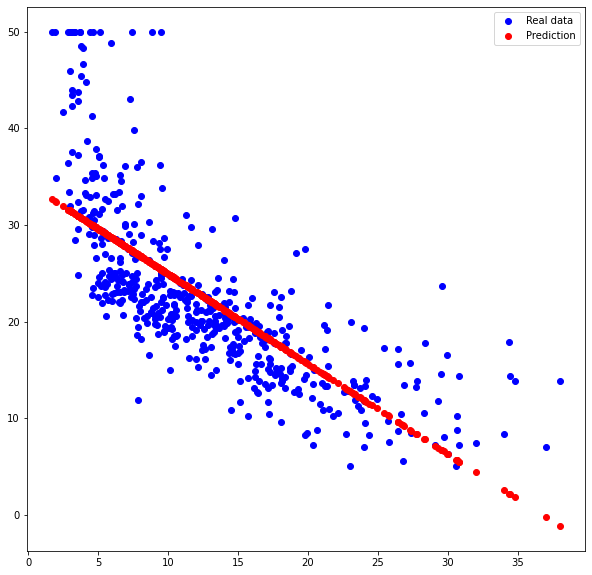

In [109]:
plt.figure(figsize=(10, 10))
plt.plot(x_data, y_data, 'bo', label='Real data')
plt.plot(x_data, x_data * w_out + b_out, 'ro', label='Prediction')
plt.legend()
plt.show()